In [1]:
import pandas as pd
from modules.make_datetime import make_datetime
from modules.sample_tools import *
pd.options.display.max_columns = 100

In [2]:
flights = pd.read_csv('../Data Exploration/samples/flights_sample.csv', sep=';', low_memory=False)
flights.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [3]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-22,AA,AA,AA,1146,AA,N921AN,1146,11433,DTW,"Detroit, MI",11298,DFW,"Dallas/Fort Worth, TX",1140,1152.0,12.0,18.0,1210.0,1339.0,16.0,1333,1355.0,22.0,0,NaN,0,N,173.0,183.0,149.0,1,986,6.0,0.0,10.0,0.0,6.0,NaN,NaN,NaN,NaN
1,2018-08-28,AA,AA,AA,1227,AA,N988NN,1227,11057,CLT,"Charlotte, NC",10821,BWI,"Baltimore, MD",800,757.0,-3.0,26.0,823.0,919.0,5.0,929,924.0,-5.0,0,NaN,0,N,89.0,87.0,56.0,1,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-14,AA,AA,AA,1513,AA,N962AN,1513,11298,DFW,"Dallas/Fort Worth, TX",11109,COS,"Colorado Springs, CO",1447,1450.0,3.0,15.0,1505.0,1543.0,6.0,1544,1549.0,5.0,0,NaN,0,N,117.0,119.0,98.0,1,592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-20,AA,AA,AA,2460,AA,N933AM,2460,11298,DFW,"Dallas/Fort Worth, TX",12892,LAX,"Los Angeles, CA",1440,1440.0,0.0,21.0,1501.0,1551.0,4.0,1615,1555.0,-20.0,0,NaN,0,N,215.0,195.0,170.0,1,1235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-07,AA,AA,AA,1213,AA,N896NN,1213,13930,ORD,"Chicago, IL",14747,SEA,"Seattle, WA",1150,1153.0,3.0,23.0,1216.0,1402.0,13.0,1422,1415.0,-7.0,0,NaN,0,N,272.0,262.0,226.0,1,1721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights = make_datetime(flights)

Converting fl_date...
Formatting crs_dep_time for datetime object conversion...
Formatting crs_arr_time for datetime object conversion...
Complete! Converted df returned.


In [5]:
flights_X, flights_y = clean_and_split_model_train(flights)

In [6]:
flights_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98062 entries, 0 to 99995
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fl_date             98062 non-null  datetime64[ns]
 1   mkt_unique_carrier  98062 non-null  object        
 2   branded_code_share  98062 non-null  object        
 3   mkt_carrier         98062 non-null  object        
 4   mkt_carrier_fl_num  98062 non-null  int64         
 5   op_unique_carrier   98062 non-null  object        
 6   tail_num            98062 non-null  object        
 7   op_carrier_fl_num   98062 non-null  int64         
 8   origin_airport_id   98062 non-null  int64         
 9   origin              98062 non-null  object        
 10  origin_city_name    98062 non-null  object        
 11  dest_airport_id     98062 non-null  int64         
 12  dest                98062 non-null  object        
 13  dest_city_name      98062 non-null  object    

In [7]:
flights_y

0        22.0
1        -5.0
2         5.0
3       -20.0
4        -7.0
         ... 
99990    -4.0
99992    71.0
99993    56.0
99994     0.0
99995   -17.0
Name: arr_delay, Length: 98062, dtype: float64

### Drop columns we wont use

In [8]:
flights_X = flights_X[['fl_date', 'mkt_unique_carrier', 'origin_city_name', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'distance']]
flights_X

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,distance
0,2019-05-22,AA,"Detroit, MI","Dallas/Fort Worth, TX",1900-01-01 11:40:00,1900-01-01 13:33:00,986
1,2018-08-28,AA,"Charlotte, NC","Baltimore, MD",1900-01-01 08:00:00,1900-01-01 09:29:00,361
2,2018-01-14,AA,"Dallas/Fort Worth, TX","Colorado Springs, CO",1900-01-01 14:47:00,1900-01-01 15:44:00,592
3,2018-02-20,AA,"Dallas/Fort Worth, TX","Los Angeles, CA",1900-01-01 14:40:00,1900-01-01 16:15:00,1235
4,2019-06-07,AA,"Chicago, IL","Seattle, WA",1900-01-01 11:50:00,1900-01-01 14:22:00,1721
...,...,...,...,...,...,...,...
99990,2019-03-31,WN,"Atlanta, GA","Fort Lauderdale, FL",1900-01-01 22:55:00,1900-01-01 00:50:00,581
99992,2019-02-04,WN,"Seattle, WA","Denver, CO",1900-01-01 14:30:00,1900-01-01 18:05:00,1024
99993,2019-11-21,WN,"Ontario, CA","Phoenix, AZ",1900-01-01 15:10:00,1900-01-01 17:20:00,325
99994,2018-10-16,WN,"St. Louis, MO","Wichita, KS",1900-01-01 10:35:00,1900-01-01 11:55:00,392


### Convert departure and arrival time to hours

In [9]:
flights_X['crs_dep_time'] = flights_X['crs_dep_time'].dt.hour
flights_X['crs_arr_time'] = flights_X['crs_arr_time'].dt.hour

In [10]:
flights_X

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,distance
0,2019-05-22,AA,"Detroit, MI","Dallas/Fort Worth, TX",11,13,986
1,2018-08-28,AA,"Charlotte, NC","Baltimore, MD",8,9,361
2,2018-01-14,AA,"Dallas/Fort Worth, TX","Colorado Springs, CO",14,15,592
3,2018-02-20,AA,"Dallas/Fort Worth, TX","Los Angeles, CA",14,16,1235
4,2019-06-07,AA,"Chicago, IL","Seattle, WA",11,14,1721
...,...,...,...,...,...,...,...
99990,2019-03-31,WN,"Atlanta, GA","Fort Lauderdale, FL",22,0,581
99992,2019-02-04,WN,"Seattle, WA","Denver, CO",14,18,1024
99993,2019-11-21,WN,"Ontario, CA","Phoenix, AZ",15,17,325
99994,2018-10-16,WN,"St. Louis, MO","Wichita, KS",10,11,392


### Convert fl_date to month

In [11]:
flights_X['fl_date'] = flights_X['fl_date'].dt.month

In [12]:
flights_X

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,distance
0,5,AA,"Detroit, MI","Dallas/Fort Worth, TX",11,13,986
1,8,AA,"Charlotte, NC","Baltimore, MD",8,9,361
2,1,AA,"Dallas/Fort Worth, TX","Colorado Springs, CO",14,15,592
3,2,AA,"Dallas/Fort Worth, TX","Los Angeles, CA",14,16,1235
4,6,AA,"Chicago, IL","Seattle, WA",11,14,1721
...,...,...,...,...,...,...,...
99990,3,WN,"Atlanta, GA","Fort Lauderdale, FL",22,0,581
99992,2,WN,"Seattle, WA","Denver, CO",14,18,1024
99993,11,WN,"Ontario, CA","Phoenix, AZ",15,17,325
99994,10,WN,"St. Louis, MO","Wichita, KS",10,11,392


### Convert city to state

In [13]:
for i in range(len(flights_X)):
    flights_X.iloc[i, 2] = flights_X.iloc[i, 2][-2:]
    flights_X.iloc[i, 3] = flights_X.iloc[i, 3][-2:]
flights_X

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,distance
0,5,AA,MI,TX,11,13,986
1,8,AA,NC,MD,8,9,361
2,1,AA,TX,CO,14,15,592
3,2,AA,TX,CA,14,16,1235
4,6,AA,IL,WA,11,14,1721
...,...,...,...,...,...,...,...
99990,3,WN,GA,FL,22,0,581
99992,2,WN,WA,CO,14,18,1024
99993,11,WN,CA,AZ,15,17,325
99994,10,WN,MO,KS,10,11,392


In [15]:
# flights_X_backup = flights_X.copy(deep=True)

In [16]:
flights_X = flights_X_backup.copy(deep=True)

In [17]:
flights_X

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,distance
0,5,AA,MI,TX,11,13,986
1,8,AA,NC,MD,8,9,361
2,1,AA,TX,CO,14,15,592
3,2,AA,TX,CA,14,16,1235
4,6,AA,IL,WA,11,14,1721
...,...,...,...,...,...,...,...
99990,3,WN,GA,FL,22,0,581
99992,2,WN,WA,CO,14,18,1024
99993,11,WN,CA,AZ,15,17,325
99994,10,WN,MO,KS,10,11,392


### Rename columns

In [18]:
flights_X.rename(columns={'fl_date': 'Month', 
                          'mkt_unique_carrier': 'Carrier', 
                          'origin_city_name': 'Originating State',
                          'dest_city_name': 'Arriving State',
                          'crs_dep_time': 'Departure Hour',
                          'crs_arr_time': 'Arrival Hour',
                          'distance': 'Distance'}, inplace=True)

In [19]:
flights_X.reset_index(inplace=True, drop=True)

In [20]:
flights_X.head()

,Month,Carrier,Originating State,Arriving State,Departure Hour,Arrival Hour,Distance
0,5,AA,MI,TX,11,13,986
1,8,AA,NC,MD,8,9,361
2,1,AA,TX,CO,14,15,592
3,2,AA,TX,CA,14,16,1235
4,6,AA,IL,WA,11,14,1721


### Append Feature engineered columns

In [22]:
taxi_delay_idx = pd.read_csv('Waleed/flights_X_Taxi.csv', sep=';', index_col=0)
taxi_delay_idx = taxi_delay_idx.iloc[:, -4:]

#### Generate columns

In [24]:
dep_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/dep_median_hourly_delays.csv', sep=';')
arr_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/arr_median_hourly_delays.csv', sep=';')
median_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/median_monthly_delays.csv', sep=';')
dep_mode_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/dep_mode_hourly_delays.csv', sep=';')
arr_mode_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/arr_mode_hourly_delays.csv', sep=';')
mode_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/mode_monthly_delays.csv', sep=';')
car_median_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/car_median_monthly_delays.csv', sep=';', index_col=0)
car_mode_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/car_mode_monthly_delays.csv', sep=';', index_col=0)
car_arr_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/car_arr_median_hourly_delays.csv', sep=';', index_col=0)
car_dep_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/car_dep_median_hourly_delays.csv', sep=';', index_col=0)
state_dep_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/state_dep_median_hourly_delays.csv', sep=';', index_col=0)
state_arr_median_hourly_delays = pd.read_csv('../Feature Engineering/delay idx tables/state_arr_median_hourly_delays.csv', sep=';', index_col=0)
state_dep_median_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/state_dep_median_monthly_delays.csv', sep=';', index_col=0)
state_arr_median_monthly_delays = pd.read_csv('../Feature Engineering/delay idx tables/state_arr_median_monthly_delays.csv', sep=';', index_col=0)
med_hourly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/med_hourly_dep_delay_dep.csv', sep=';', index_col=0)
med_monthly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/med_monthly_dep_delay_dep.csv', sep=';', index_col=0)
avg_hourly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/avg_hourly_dep_delay_dep.csv', sep=';', index_col=0)
avg_monthly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/avg_monthly_dep_delay_dep.csv', sep=';', index_col=0)
mode_hourly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/mode_hourly_dep_delay_dep.csv', sep=';', index_col=0)
mode_monthly_dep_delay_dep = pd.read_csv('../Feature Engineering/delay idx tables/mode_monthly_dep_delay_dep.csv', sep=';', index_col=0)

In [35]:
med_hourly_dep_delay_dep.reset_index(inplace=True)
med_monthly_dep_delay_dep.reset_index(inplace=True)
avg_hourly_dep_delay_dep.reset_index(inplace=True)
avg_monthly_dep_delay_dep.reset_index(inplace=True)
mode_hourly_dep_delay_dep.reset_index(inplace=True)
mode_monthly_dep_delay_dep.reset_index(inplace=True)

In [36]:
flights_X.head()

,Month,Carrier,Originating State,Arriving State,Departure Hour,Arrival Hour,Distance
0,5,AA,MI,TX,11,13,986
1,8,AA,NC,MD,8,9,361
2,1,AA,TX,CO,14,15,592
3,2,AA,TX,CA,14,16,1235
4,6,AA,IL,WA,11,14,1721


In [39]:
med_monthly_dep_delay_dep.head()

,fl_date,dep_delay
0,1,-3.0
1,2,-2.0
2,3,-2.0
3,4,-3.0
4,5,-2.0


In [38]:
med_hourly_dep_delay_dep_list = []
avg_hourly_dep_delay_dep_list = []
mode_hourly_dep_delay_dep_list = []

for i in range(len(flights_X)):
    med_hourly_dep_delay_dep_list.append(float(med_hourly_dep_delay_dep.loc[(med_hourly_dep_delay_dep['crs_dep_time'] == flights_X.iloc[i, 4]), 
                                                                             'dep_delay'].values))
    avg_hourly_dep_delay_dep_list.append(float(avg_hourly_dep_delay_dep.loc[(avg_hourly_dep_delay_dep['crs_dep_time'] == flights_X.iloc[i, 4]), 
                                                                             'dep_delay'].values))
    mode_hourly_dep_delay_dep_list.append(float(mode_hourly_dep_delay_dep.loc[(mode_hourly_dep_delay_dep['crs_dep_time'] == flights_X.iloc[i, 4]), 
                                                                             'dep_delay'].values))

In [40]:
med_monthly_dep_delay_dep_list = []
avg_monthly_dep_delay_dep_list = []
mode_monthly_dep_delay_dep_list = []

for i in range(len(flights_X)):
    med_monthly_dep_delay_dep_list.append(float(med_monthly_dep_delay_dep.loc[(med_monthly_dep_delay_dep['fl_date'] == flights_X.iloc[i, 0]), 
                                                                             'dep_delay'].values))
    avg_monthly_dep_delay_dep_list.append(float(avg_monthly_dep_delay_dep.loc[(avg_monthly_dep_delay_dep['fl_date'] == flights_X.iloc[i, 0]), 
                                                                             'dep_delay'].values))
    mode_monthly_dep_delay_dep_list.append(float(mode_monthly_dep_delay_dep.loc[(mode_monthly_dep_delay_dep['fl_date'] == flights_X.iloc[i, 0]), 
                                                                             'dep_delay'].values))

In [41]:
state_dep_median_monthly_list, state_arr_median_monthly_list = [], []
for i in range(len(flights_X)):
    state_dep_median_monthly_list.append(float(state_dep_median_monthly_delays.loc[((state_dep_median_monthly_delays['Month'] == flights_X.iloc[i, 0]) & (state_dep_median_monthly_delays['Origin State'] == flights_X.iloc[i, 2])), 
                                                                             'Monthly Arrival Delay(Median)'].values))
    state_arr_median_monthly_list.append(float(state_arr_median_monthly_delays.loc[((state_arr_median_monthly_delays['Month'] == flights_X.iloc[i, 0]) & (state_arr_median_monthly_delays['Destination State'] == flights_X.iloc[i, 3])), 
                                                                             'Monthly Arrival Delay(Median)'].values))

In [42]:
state_dep_median_hourly_list, state_arr_median_hourly_list = [], []
for i in range(len(flights_X)):
    state_dep_median_hourly_list.append(float(state_dep_median_hourly_delays.loc[((state_dep_median_hourly_delays['Scheduled Departure (Hour)'] == flights_X.iloc[i, 4]) & (state_dep_median_hourly_delays['Origin State'] == flights_X.iloc[i, 2])), 
                                                                             'Hourly Arrival Delay(Median)'].values))
    state_arr_median_hourly_list.append(float(state_arr_median_hourly_delays.loc[((state_arr_median_hourly_delays['Scheduled Arrival (Hour)'] == flights_X.iloc[i, 5]) & (state_arr_median_hourly_delays['Destination State'] == flights_X.iloc[i, 3])), 
                                                                             'Hourly Arrival Delay(Median)'].values))

In [43]:
car_median_monthly_list = []
for i in range(len(flights_X)):
    car_median_monthly_list.append(float(car_median_monthly_delays.loc[((car_median_monthly_delays['Month'] == flights_X.iloc[i, 0]) & (car_median_monthly_delays['Airline'] == flights_X.iloc[i, 1])), 
                                                                 'Monthly Arrival Delay(Median)'].values))

In [44]:
car_mode_monthly_list = []
for i in range(len(flights_X)):
    car_mode_monthly_list.append(float(car_mode_monthly_delays.loc[((car_mode_monthly_delays['Month'] == flights_X.iloc[i, 0]) & (car_mode_monthly_delays['Airline'] == flights_X.iloc[i, 1])), 
                                                                 'Monthly Arrival Delay(Mode)'].values))

In [45]:
car_arr_median_daily_list = []
for i in range(len(flights_X)):
    car_arr_median_daily_list.append(float(car_arr_median_hourly_delays.loc[((car_arr_median_hourly_delays['Scheduled Arrival (Hour)'] == flights_X.iloc[i, 5]) & (car_arr_median_hourly_delays['Airline'] == flights_X.iloc[i, 1])), 
                                                                 'Hourly Arrival Delay(Median)'].values))

In [46]:
car_dep_median_daily_list = []
for i in range(len(flights_X)):
    car_dep_median_daily_list.append(float(car_dep_median_hourly_delays.loc[((car_dep_median_hourly_delays['Scheduled Departure (Hour)'] == flights_X.iloc[i, 4]) & (car_dep_median_hourly_delays['Airline'] == flights_X.iloc[i, 1])), 
                                                                 'Hourly Arrival Delay(Median)'].values))

In [47]:
dep_median_hourly_list = []
for i in range(len(flights_X)):
    dep_median_hourly_list.append(dep_median_hourly_delays.iloc[flights_X.iloc[i, 4], 1])

In [48]:
arr_median_hourly_list = []
for i in range(len(flights_X)):
    arr_median_hourly_list.append(arr_median_hourly_delays.iloc[flights_X.iloc[i, 5], 1])

In [49]:
median_monthly_list = []
for i in range(len(flights_X)):
    median_monthly_list.append(median_monthly_delays.iloc[(flights_X.iloc[i, 0] - 1), 1])

In [50]:
dep_mode_hourly_list = []
for i in range(len(flights_X)):
    dep_mode_hourly_list.append(dep_mode_hourly_delays.iloc[flights_X.iloc[i, 4], 1])

In [51]:
arr_mode_hourly_list = []
for i in range(len(flights_X)):
    arr_mode_hourly_list.append(arr_mode_hourly_delays.iloc[flights_X.iloc[i, 5], 1])

In [52]:
mode_monthly_list = []
for i in range(len(flights_X)):
    mode_monthly_list.append(mode_monthly_delays.iloc[(flights_X.iloc[i, 0] - 1), 1])

#### Add columns

In [53]:
for feature in ['Mode TOD Taxi-In IDX', 'Mode TOD Taxi-Out IDX', 'Median TOD Taxi-In IDX', 'Median TOD Taxi-Out IDX']:
    flights_X[feature] = taxi_delay_idx[feature]
    
flights_X

,Month,Carrier,Originating State,Arriving State,Departure Hour,Arrival Hour,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX
0,5,AA,MI,TX,11,13,986,4.0,12.5,6.0,15.0
1,8,AA,NC,MD,8,9,361,4.0,12.0,5.0,16.0
2,1,AA,TX,CO,14,15,592,4.0,13.0,6.0,14.0
3,2,AA,TX,CA,14,16,1235,4.0,11.0,6.0,15.0
4,6,AA,IL,WA,11,14,1721,4.0,11.0,6.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
98057,3,WN,GA,FL,22,0,581,4.0,13.0,5.0,14.0
98058,2,WN,WA,CO,14,18,1024,4.0,14.0,6.0,14.0
98059,11,WN,CA,AZ,15,17,325,4.0,13.0,6.0,15.0
98060,10,WN,MO,KS,10,11,392,4.0,10.0,5.0,15.0


In [54]:
flights_X['Hourly Arrival Delay - Dep(Median)'] = dep_median_hourly_list
flights_X['Hourly Arrival Delay - Dep(Mode)'] = dep_mode_hourly_list
flights_X['Hourly Arrival Delay - Arr(Median)'] = arr_median_hourly_list
flights_X['Hourly Arrival Delay - Arr(Mode)'] = arr_mode_hourly_list
flights_X['Monthly Arrival Delay(Median)'] = median_monthly_list
flights_X['Monthly Arrival Delay(Mode)'] = mode_monthly_list
flights_X['Carrier Based Hourly Arrival Delay - Dep(Median)'] = car_dep_median_daily_list
flights_X['Carrier Based Hourly Arrival Delay - Arr(Median)'] = car_arr_median_daily_list
flights_X['Carrier Based Monthly Arrival Delay - (Mode)'] = car_mode_monthly_list
flights_X['Carrier Based Monthly Arrival Delay - (Median)'] = car_median_monthly_list
flights_X['State Based Monthly Arrival Delay - Dep(Median)'] = state_dep_median_monthly_list
flights_X['State Based Monthly Arrival Delay - Arr(Median)'] = state_arr_median_monthly_list
flights_X['State Based Hourly Arrival Delay - Dep(Median)'] = state_dep_median_hourly_list
flights_X['State Based Hourly Arrival Delay - Arr(Median)'] = state_arr_median_hourly_list
flights_X['Median Hourly Departure Delay'] = med_hourly_dep_delay_dep_list
flights_X['Avg Hourly Departure Delay'] = avg_hourly_dep_delay_dep_list
flights_X['Mode Hourly Departure Delay'] = mode_hourly_dep_delay_dep_list
flights_X['Median Monthly Departure Delay'] = med_monthly_dep_delay_dep_list
flights_X['Avg Monthly Departure Delay'] = avg_monthly_dep_delay_dep_list
flights_X['Mode Monthly Departure Delay'] = mode_monthly_dep_delay_dep_list

In [55]:
flights_X

,Month,Carrier,Originating State,Arriving State,Departure Hour,Arrival Hour,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX,Hourly Arrival Delay - Dep(Median),Hourly Arrival Delay - Dep(Mode),Hourly Arrival Delay - Arr(Median),Hourly Arrival Delay - Arr(Mode),Monthly Arrival Delay(Median),Monthly Arrival Delay(Mode),Carrier Based Hourly Arrival Delay - Dep(Median),Carrier Based Hourly Arrival Delay - Arr(Median),Carrier Based Monthly Arrival Delay - (Mode),Carrier Based Monthly Arrival Delay - (Median),State Based Monthly Arrival Delay - Dep(Median),State Based Monthly Arrival Delay - Arr(Median),State Based Hourly Arrival Delay - Dep(Median),State Based Hourly Arrival Delay - Arr(Median),Median Hourly Departure Delay,Avg Hourly Departure Delay,Mode Hourly Departure Delay,Median Monthly Departure Delay,Avg Monthly Departure Delay,Mode Monthly Departure Delay
0,5,AA,MI,TX,11,13,986,4.0,12.5,6.0,15.0,-7.0,-6.000000,-7.0,-6.0,-5.00,-4.0,-6.00,-5.0,-8.0,-5.0,-4.0,-6.5,-4.00,-6.50,-2.0,8.443086,-5.0,-2.0,11.352304,-5.0
1,8,AA,NC,MD,8,9,361,4.0,12.0,5.0,16.0,-7.5,-6.500000,-8.0,-7.0,-4.00,-3.0,-7.00,-7.0,-10.5,-3.5,-1.0,-5.0,-10.00,-9.00,-3.0,5.267288,-5.0,-2.0,14.172587,-5.0
2,1,AA,TX,CO,14,15,592,4.0,13.0,6.0,14.0,-3.0,-2.000000,-5.0,-3.5,-6.00,-5.0,-1.00,-4.0,-4.0,-5.0,-5.0,-6.5,-1.50,-7.00,-1.0,14.501372,-5.0,-3.0,9.329436,-5.0
3,2,AA,TX,CA,14,16,1235,4.0,11.0,6.0,15.0,-3.0,-2.000000,-4.0,-3.0,-4.75,-3.6,-1.00,-3.0,-9.0,-4.0,-3.5,-2.0,-1.50,-5.00,-1.0,14.501372,-5.0,-2.0,12.772081,-4.0
4,6,AA,IL,WA,11,14,1721,4.0,11.0,6.0,15.0,-7.0,-6.000000,-6.0,-5.0,-3.00,-2.0,-6.00,-6.0,-8.0,-1.5,1.0,-1.0,-7.00,-0.25,-2.0,8.443086,-5.0,-1.0,14.943615,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98057,3,WN,GA,FL,22,0,581,4.0,13.0,5.0,14.0,-3.5,-1.333333,-1.0,0.0,-6.00,-5.0,5.00,3.0,-3.5,-4.0,-5.0,-5.5,-6.00,2.50,-2.0,14.191301,-5.0,-2.0,8.089604,-5.0
98058,2,WN,WA,CO,14,18,1024,4.0,14.0,6.0,14.0,-3.0,-2.000000,-3.0,-1.5,-4.75,-3.6,-1.00,-1.0,-9.0,-2.0,-5.0,-1.0,0.00,-4.00,-1.0,14.501372,-5.0,-2.0,12.772081,-4.0
98059,11,WN,CA,AZ,15,17,325,4.0,13.0,6.0,15.0,-3.5,-2.000000,-3.0,-1.0,-6.00,-5.0,-1.25,-1.0,-4.0,-5.0,-5.0,-6.0,-4.75,1.00,-1.0,13.926424,-5.0,-3.0,8.623401,-5.0
98060,10,WN,MO,KS,10,11,392,4.0,10.0,5.0,15.0,-7.0,-6.000000,-7.0,-6.0,-6.00,-5.5,-7.25,-6.5,-7.0,-5.0,-4.0,0.0,-4.00,-1.00,-3.0,6.572748,-3.0,-3.0,8.001184,-5.0


In [57]:
# flights_X.to_csv('flights_X_ft_eng_cols_added_backup.csv', sep=';')

In [4]:
flights_X = pd.read_csv('flights_X_ft_eng_cols_added_backup.csv', sep=';', index_col=0)

In [58]:
flights_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98062 entries, 0 to 98061
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Month                                             98062 non-null  int64  
 1   Carrier                                           98062 non-null  object 
 2   Originating State                                 98062 non-null  object 
 3   Arriving State                                    98062 non-null  object 
 4   Departure Hour                                    98062 non-null  int64  
 5   Arrival Hour                                      98062 non-null  int64  
 6   Distance                                          98062 non-null  int64  
 7   Mode TOD Taxi-In IDX                              98062 non-null  float64
 8   Mode TOD Taxi-Out IDX                             98062 non-null  float64
 9   Median TOD Taxi-I

### Convert categorical into dummies

In [59]:
flights_X = pd.get_dummies(flights_X, columns=['Month', 
                                             'Carrier', 
                                             'Originating State', 
                                             'Arriving State', 
                                             'Departure Hour',
                                             'Arrival Hour'])
flights_X.head()

,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX,Hourly Arrival Delay - Dep(Median),Hourly Arrival Delay - Dep(Mode),Hourly Arrival Delay - Arr(Median),Hourly Arrival Delay - Arr(Mode),Monthly Arrival Delay(Median),Monthly Arrival Delay(Mode),Carrier Based Hourly Arrival Delay - Dep(Median),Carrier Based Hourly Arrival Delay - Arr(Median),Carrier Based Monthly Arrival Delay - (Mode),Carrier Based Monthly Arrival Delay - (Median),State Based Monthly Arrival Delay - Dep(Median),State Based Monthly Arrival Delay - Arr(Median),State Based Hourly Arrival Delay - Dep(Median),State Based Hourly Arrival Delay - Arr(Median),Median Hourly Departure Delay,Avg Hourly Departure Delay,Mode Hourly Departure Delay,Median Monthly Departure Delay,Avg Monthly Departure Delay,Mode Monthly Departure Delay,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Carrier_AA,Carrier_AS,Carrier_B6,Carrier_DL,Carrier_F9,Carrier_G4,Carrier_HA,Carrier_NK,Carrier_UA,Carrier_VX,Carrier_WN,Originating State_AK,Originating State_AL,...,Arriving State_WV,Arriving State_WY,Departure Hour_0,Departure Hour_1,Departure Hour_2,Departure Hour_3,Departure Hour_4,Departure Hour_5,Departure Hour_6,Departure Hour_7,Departure Hour_8,Departure Hour_9,Departure Hour_10,Departure Hour_11,Departure Hour_12,Departure Hour_13,Departure Hour_14,Departure Hour_15,Departure Hour_16,Departure Hour_17,Departure Hour_18,Departure Hour_19,Departure Hour_20,Departure Hour_21,Departure Hour_22,Departure Hour_23,Arrival Hour_0,Arrival Hour_1,Arrival Hour_2,Arrival Hour_3,Arrival Hour_4,Arrival Hour_5,Arrival Hour_6,Arrival Hour_7,Arrival Hour_8,Arrival Hour_9,Arrival Hour_10,Arrival Hour_11,Arrival Hour_12,Arrival Hour_13,Arrival Hour_14,Arrival Hour_15,Arrival Hour_16,Arrival Hour_17,Arrival Hour_18,Arrival Hour_19,Arrival Hour_20,Arrival Hour_21,Arrival Hour_22,Arrival Hour_23
0,986,4.0,12.5,6.0,15.0,-7.0,-6.0,-7.0,-6.0,-5.00,-4.0,-6.0,-5.0,-8.0,-5.0,-4.0,-6.5,-4.0,-6.50,-2.0,8.443086,-5.0,-2.0,11.352304,-5.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,361,4.0,12.0,5.0,16.0,-7.5,-6.5,-8.0,-7.0,-4.00,-3.0,-7.0,-7.0,-10.5,-3.5,-1.0,-5.0,-10.0,-9.00,-3.0,5.267288,-5.0,-2.0,14.172587,-5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,592,4.0,13.0,6.0,14.0,-3.0,-2.0,-5.0,-3.5,-6.00,-5.0,-1.0,-4.0,-4.0,-5.0,-5.0,-6.5,-1.5,-7.00,-1.0,14.501372,-5.0,-3.0,9.329436,-5.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1235,4.0,11.0,6.0,15.0,-3.0,-2.0,-4.0,-3.0,-4.75,-3.6,-1.0,-3.0,-9.0,-4.0,-3.5,-2.0,-1.5,-5.00,-1.0,14.501372,-5.0,-2.0,12.772081,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1721,4.0,11.0,6.0,15.0,-7.0,-6.0,-6.0,-5.0,-3.00,-2.0,-6.0,-6.0,-8.0,-1.5,1.0,-1.0,-7.0,-0.25,-2.0,8.443086,-5.0,-1.0,14.943615,-4.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Scale remaining features

In [60]:
flights_X_cat_dummies = flights_X.iloc[:, 25:]
flights_X_num = flights_X.iloc[:, 0:25]

In [61]:
flights_X_cat_dummies.head()

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Carrier_AA,Carrier_AS,Carrier_B6,Carrier_DL,Carrier_F9,Carrier_G4,Carrier_HA,Carrier_NK,Carrier_UA,Carrier_VX,Carrier_WN,Originating State_AK,Originating State_AL,Originating State_AR,Originating State_AZ,Originating State_CA,Originating State_CO,Originating State_CT,Originating State_DC,Originating State_FL,Originating State_GA,Originating State_HI,Originating State_IA,Originating State_ID,Originating State_IL,Originating State_IN,Originating State_KS,Originating State_KY,Originating State_LA,Originating State_MA,Originating State_MD,Originating State_ME,Originating State_MI,Originating State_MN,Originating State_MO,Originating State_MS,Originating State_MT,Originating State_NC,...,Arriving State_WV,Arriving State_WY,Departure Hour_0,Departure Hour_1,Departure Hour_2,Departure Hour_3,Departure Hour_4,Departure Hour_5,Departure Hour_6,Departure Hour_7,Departure Hour_8,Departure Hour_9,Departure Hour_10,Departure Hour_11,Departure Hour_12,Departure Hour_13,Departure Hour_14,Departure Hour_15,Departure Hour_16,Departure Hour_17,Departure Hour_18,Departure Hour_19,Departure Hour_20,Departure Hour_21,Departure Hour_22,Departure Hour_23,Arrival Hour_0,Arrival Hour_1,Arrival Hour_2,Arrival Hour_3,Arrival Hour_4,Arrival Hour_5,Arrival Hour_6,Arrival Hour_7,Arrival Hour_8,Arrival Hour_9,Arrival Hour_10,Arrival Hour_11,Arrival Hour_12,Arrival Hour_13,Arrival Hour_14,Arrival Hour_15,Arrival Hour_16,Arrival Hour_17,Arrival Hour_18,Arrival Hour_19,Arrival Hour_20,Arrival Hour_21,Arrival Hour_22,Arrival Hour_23
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [63]:
flights_X_num.head()

,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX,Hourly Arrival Delay - Dep(Median),Hourly Arrival Delay - Dep(Mode),Hourly Arrival Delay - Arr(Median),Hourly Arrival Delay - Arr(Mode),Monthly Arrival Delay(Median),Monthly Arrival Delay(Mode),Carrier Based Hourly Arrival Delay - Dep(Median),Carrier Based Hourly Arrival Delay - Arr(Median),Carrier Based Monthly Arrival Delay - (Mode),Carrier Based Monthly Arrival Delay - (Median),State Based Monthly Arrival Delay - Dep(Median),State Based Monthly Arrival Delay - Arr(Median),State Based Hourly Arrival Delay - Dep(Median),State Based Hourly Arrival Delay - Arr(Median),Median Hourly Departure Delay,Avg Hourly Departure Delay,Mode Hourly Departure Delay,Median Monthly Departure Delay,Avg Monthly Departure Delay,Mode Monthly Departure Delay
0,986,4.0,12.5,6.0,15.0,-7.0,-6.0,-7.0,-6.0,-5.00,-4.0,-6.0,-5.0,-8.0,-5.0,-4.0,-6.5,-4.0,-6.50,-2.0,8.443086,-5.0,-2.0,11.352304,-5.0
1,361,4.0,12.0,5.0,16.0,-7.5,-6.5,-8.0,-7.0,-4.00,-3.0,-7.0,-7.0,-10.5,-3.5,-1.0,-5.0,-10.0,-9.00,-3.0,5.267288,-5.0,-2.0,14.172587,-5.0
2,592,4.0,13.0,6.0,14.0,-3.0,-2.0,-5.0,-3.5,-6.00,-5.0,-1.0,-4.0,-4.0,-5.0,-5.0,-6.5,-1.5,-7.00,-1.0,14.501372,-5.0,-3.0,9.329436,-5.0
3,1235,4.0,11.0,6.0,15.0,-3.0,-2.0,-4.0,-3.0,-4.75,-3.6,-1.0,-3.0,-9.0,-4.0,-3.5,-2.0,-1.5,-5.00,-1.0,14.501372,-5.0,-2.0,12.772081,-4.0
4,1721,4.0,11.0,6.0,15.0,-7.0,-6.0,-6.0,-5.0,-3.00,-2.0,-6.0,-6.0,-8.0,-1.5,1.0,-1.0,-7.0,-0.25,-2.0,8.443086,-5.0,-1.0,14.943615,-4.0


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
flights_X_num_scaled = scaler.fit_transform(flights_X_num)

In [66]:
scaled_col_list = flights_X_num.columns.values
flights_X_num_scaled = pd.DataFrame(flights_X_num_scaled, columns=scaled_col_list)
flights_X_num_scaled

,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX,Hourly Arrival Delay - Dep(Median),Hourly Arrival Delay - Dep(Mode),Hourly Arrival Delay - Arr(Median),Hourly Arrival Delay - Arr(Mode),Monthly Arrival Delay(Median),Monthly Arrival Delay(Mode),Carrier Based Hourly Arrival Delay - Dep(Median),Carrier Based Hourly Arrival Delay - Arr(Median),Carrier Based Monthly Arrival Delay - (Mode),Carrier Based Monthly Arrival Delay - (Median),State Based Monthly Arrival Delay - Dep(Median),State Based Monthly Arrival Delay - Arr(Median),State Based Hourly Arrival Delay - Dep(Median),State Based Hourly Arrival Delay - Arr(Median),Median Hourly Departure Delay,Avg Hourly Departure Delay,Mode Hourly Departure Delay,Median Monthly Departure Delay,Avg Monthly Departure Delay,Mode Monthly Departure Delay
0,0.367735,-0.556467,0.222410,-0.062559,0.020296,-0.828041,-0.794196,-0.858789,-0.809820,0.260995,0.286297,-0.303668,-0.004686,0.399217,0.180781,0.447315,-0.464289,0.207546,-0.397047,0.074723,-0.439911,-0.511736,0.523181,0.282753,-0.526655
1,-0.695907,-0.556467,-0.136145,-1.285582,0.961999,-1.039910,-0.973829,-1.282130,-1.179007,1.036127,1.033839,-0.607932,-0.615969,-0.205288,0.840649,1.477753,0.087926,-1.267773,-0.984251,-0.812270,-1.083765,-0.511736,0.523181,1.360926,-0.526655
2,-0.302785,-0.556467,0.580965,-0.062559,-0.921406,0.866913,0.642867,-0.012107,0.113150,-0.514137,-0.461246,1.217654,0.300955,1.366425,0.180781,0.103836,-0.464289,0.822262,-0.514488,0.961715,0.788331,-0.511736,-1.078122,-0.490575,-0.526655
3,0.791490,-0.556467,-0.853256,-0.062559,0.020296,0.866913,0.642867,0.411234,0.297744,0.454778,0.585314,1.217654,0.606597,0.157415,0.620693,0.619055,1.192355,0.822262,-0.044724,0.961715,0.788331,-0.511736,0.523181,0.825523,1.056862
4,1.618578,-0.556467,-0.853256,-0.062559,0.020296,-0.828041,-0.794196,-0.435448,-0.440632,1.811259,1.781382,-0.303668,-0.310328,0.399217,1.720474,2.164711,1.560498,-0.530114,1.070963,0.074723,-0.439911,-0.511736,2.124484,1.655684,1.056862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98057,-0.321505,-0.556467,0.580965,-1.285582,-0.921406,0.655044,0.882378,1.681257,1.405308,-0.514137,-0.461246,3.043241,2.440445,1.487326,0.620693,0.103836,-0.096146,-0.284227,1.716888,0.074723,0.725468,-0.511736,0.523181,-0.964553,-0.526655
98058,0.432405,-0.556467,1.298076,-0.062559,-0.921406,0.866913,0.642867,0.834575,0.851526,0.454778,0.585314,1.217654,1.217880,0.157415,1.500518,0.103836,1.560498,1.191091,0.190157,0.961715,0.788331,-0.511736,0.523181,0.825523,1.056862
98059,-0.757172,-0.556467,0.580965,-0.062559,0.020296,0.655044,0.642867,0.834575,1.036120,-0.514137,-0.461246,1.141588,1.217880,1.366425,0.180781,0.103836,-0.280217,0.023131,1.364565,0.961715,0.671768,-0.511736,-1.078122,-0.760487,-0.526655
98060,-0.643150,-0.556467,-1.570366,-1.285582,0.020296,-0.828041,-0.794196,-0.858789,-0.809820,-0.514137,-0.835018,-0.683999,-0.463148,0.641019,0.180781,0.447315,1.928641,0.207546,0.894802,-0.812270,-0.819099,2.601260,-1.078122,-0.998356,-0.526655


### merge the two back together

In [67]:
flights_X_prepped = pd.concat(objs=[flights_X_num_scaled, flights_X_cat_dummies], axis=1)

In [68]:
flights_X_prepped

,Distance,Mode TOD Taxi-In IDX,Mode TOD Taxi-Out IDX,Median TOD Taxi-In IDX,Median TOD Taxi-Out IDX,Hourly Arrival Delay - Dep(Median),Hourly Arrival Delay - Dep(Mode),Hourly Arrival Delay - Arr(Median),Hourly Arrival Delay - Arr(Mode),Monthly Arrival Delay(Median),Monthly Arrival Delay(Mode),Carrier Based Hourly Arrival Delay - Dep(Median),Carrier Based Hourly Arrival Delay - Arr(Median),Carrier Based Monthly Arrival Delay - (Mode),Carrier Based Monthly Arrival Delay - (Median),State Based Monthly Arrival Delay - Dep(Median),State Based Monthly Arrival Delay - Arr(Median),State Based Hourly Arrival Delay - Dep(Median),State Based Hourly Arrival Delay - Arr(Median),Median Hourly Departure Delay,Avg Hourly Departure Delay,Mode Hourly Departure Delay,Median Monthly Departure Delay,Avg Monthly Departure Delay,Mode Monthly Departure Delay,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Carrier_AA,Carrier_AS,Carrier_B6,Carrier_DL,Carrier_F9,Carrier_G4,Carrier_HA,Carrier_NK,Carrier_UA,Carrier_VX,Carrier_WN,Originating State_AK,Originating State_AL,...,Arriving State_WV,Arriving State_WY,Departure Hour_0,Departure Hour_1,Departure Hour_2,Departure Hour_3,Departure Hour_4,Departure Hour_5,Departure Hour_6,Departure Hour_7,Departure Hour_8,Departure Hour_9,Departure Hour_10,Departure Hour_11,Departure Hour_12,Departure Hour_13,Departure Hour_14,Departure Hour_15,Departure Hour_16,Departure Hour_17,Departure Hour_18,Departure Hour_19,Departure Hour_20,Departure Hour_21,Departure Hour_22,Departure Hour_23,Arrival Hour_0,Arrival Hour_1,Arrival Hour_2,Arrival Hour_3,Arrival Hour_4,Arrival Hour_5,Arrival Hour_6,Arrival Hour_7,Arrival Hour_8,Arrival Hour_9,Arrival Hour_10,Arrival Hour_11,Arrival Hour_12,Arrival Hour_13,Arrival Hour_14,Arrival Hour_15,Arrival Hour_16,Arrival Hour_17,Arrival Hour_18,Arrival Hour_19,Arrival Hour_20,Arrival Hour_21,Arrival Hour_22,Arrival Hour_23
0,0.367735,-0.556467,0.222410,-0.062559,0.020296,-0.828041,-0.794196,-0.858789,-0.809820,0.260995,0.286297,-0.303668,-0.004686,0.399217,0.180781,0.447315,-0.464289,0.207546,-0.397047,0.074723,-0.439911,-0.511736,0.523181,0.282753,-0.526655,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-0.695907,-0.556467,-0.136145,-1.285582,0.961999,-1.039910,-0.973829,-1.282130,-1.179007,1.036127,1.033839,-0.607932,-0.615969,-0.205288,0.840649,1.477753,0.087926,-1.267773,-0.984251,-0.812270,-1.083765,-0.511736,0.523181,1.360926,-0.526655,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.302785,-0.556467,0.580965,-0.062559,-0.921406,0.866913,0.642867,-0.012107,0.113150,-0.514137,-0.461246,1.217654,0.300955,1.366425,0.180781,0.103836,-0.464289,0.822262,-0.514488,0.961715,0.788331,-0.511736,-1.078122,-0.490575,-0.526655,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.791490,-0.556467,-0.853256,-0.062559,0.020296,0.866913,0.642867,0.411234,0.297744,0.454778,0.585314,1.217654,0.606597,0.157415,0.620693,0.619055,1.192355,0.822262,-0.044724,0.961715,0.788331,-0.511736,0.523181,0.825523,1.056862,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.618578,-0.556467,-0.853256,-0.062559,0.020296,-0.828041,-0.794196,-0.435448,-0.440632,1.811259,1.781382,-0.303668,-0.310328,0.399217,1.720474,2.164711,1.560498,-0.530114,1.070963,0.074723,-0.439911,-0.511736,2.124484,1.655684,1.056862,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### PCA

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

95 components explain 98% of the variance of the original dataset


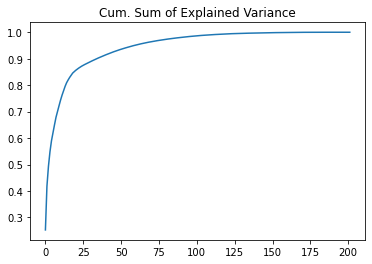

In [71]:
# plot cummulative sum of explained variance
pca = PCA()
pca.fit(flights_X_prepped)
# len(pca.explained_variance_ratio_)
plt.figure()
plt.title('Cum. Sum of Explained Variance')
plt.plot(range(202), pca.explained_variance_ratio_.cumsum())
print('109 components explain 98% of the variance of the original dataset')

In [72]:
# find the index (n_columns) at which 100% of variance explained
for i,j in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(i, j)

0 0.25282561140595083
1 0.41764121978103025
2 0.493117670235136
3 0.5480993107490169
4 0.5897419052075736
5 0.6208689329326089
6 0.6502242313598666
7 0.6788549038844959
8 0.7011023285631173
9 0.7223545051752619
10 0.7435195486013881
11 0.7623608195045734
12 0.7795821793555726
13 0.7955108999971511
14 0.8092293044365708
15 0.8196481033696991
16 0.8291910079357825
17 0.8377842092830112
18 0.8456387992594477
19 0.8508995934189792
20 0.8559828927095826
21 0.8605110730744623
22 0.864573627215762
23 0.8683248515275105
24 0.8719454212182903
25 0.8751585409219673
26 0.8782005126693666
27 0.8810970387455438
28 0.883962628212257
29 0.8867874801583258
30 0.8895728080474632
31 0.8923157065941931
32 0.8950348376170897
33 0.8976949600596026
34 0.9002829906495339
35 0.9028605851842118
36 0.9053649409834679
37 0.9078450088539071
38 0.9102474086920829
39 0.9126025861973363
40 0.9149527516905184
41 0.9172288142629984
42 0.9194996550678938
43 0.9217085585149203
44 0.9238899599285504
45 0.926015770929153


In [73]:
pca = PCA(n_components=109)

In [74]:
flights_X_pca = pca.fit_transform(flights_X_prepped)

In [75]:
flights_X_pca.shape

(98062, 109)

## Tuned Model

#### With PCA

In [76]:
#save flights as backup
# pd.DataFrame(flights_X_pca).to_csv('flights_X_pca.csv', sep=';')

In [77]:
from sklearn.model_selection import train_test_split
rand_state = 100

flights_X_train3, flights_X_test3, flights_y_train3, flights_y_test3 = train_test_split(flights_X_pca, 
                                                                                        flights_y,
                                                                                        test_size = 0.1,
                                                                                        random_state = rand_state)

In [78]:
print(flights_X_train3.shape, flights_X_test3.shape, flights_y_train3.shape, flights_y_test3.shape)

(88255, 109) (9807, 109) (88255,) (9807,)


In [79]:
flights_y_train3

49586   -12.0
9252    -12.0
33976   -15.0
97617   -16.0
71317   -17.0
         ... 
66825    29.0
79130   -24.0
81209     8.0
57158   -29.0
39318     3.0
Name: arr_delay, Length: 88255, dtype: float64

In [80]:
import xgboost, numpy as np

In [81]:
xgb = xgboost.XGBRegressor(objective='reg:squarederror', random_state=120, n_estimators=100, max_depth=2, learning_rate=0.11, n_jobs=-1)

In [82]:
xgb.fit(flights_X_train3, flights_y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.11, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=120,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
#objective='reg:squarederror', random_state=120, n_estimators=125, max_depth=2, learning_rate=0.11

flights_y_test3_pred = xgb.predict(flights_X_test3)
flights_y_train3_pred = xgb.predict(flights_X_train3)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test3, flights_y_test3_pred)}\nTrain R2 Score: {r2_score(flights_y_train3, flights_y_train3_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test3, flights_y_test3_pred)}\nTrain MSE: {mean_squared_error(flights_y_train3, flights_y_train3_pred)}\n')

Test R2 Score: 0.023839217127211487
Train R2 Score: 0.04928145003367623

Test MSE: 2553.253839552699
Train MSE: 2316.1721128511995



In [38]:
#objective='reg:squarederror', random_state=120, n_estimators=125, max_depth=2, learning_rate=0.11

flights_y_test3_pred = xgb.predict(flights_X_test3)
flights_y_train3_pred = xgb.predict(flights_X_train3)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test3, flights_y_test3_pred)}\nTrain R2 Score: {r2_score(flights_y_train3, flights_y_train3_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test3, flights_y_test3_pred)}\nTrain MSE: {mean_squared_error(flights_y_train3, flights_y_train3_pred)}\n')

Test R2 Score: 0.025545180962578073
Train R2 Score: 0.0507506322506488

Test MSE: 2548.7917070954113
Train MSE: 2312.592842330214



In [350]:
# #objective='reg:squarederror', random_state=120, n_estimators=125, max_depth=2, learning_rate=0.11

# flights_y_test_pred = xgb.predict(flights_X_test)
# flights_y_train_pred = xgb.predict(flights_X_train)

# from sklearn.metrics import r2_score, mean_squared_error
# print(f'Test R2 Score: {r2_score(flights_y_test, flights_y_test_pred)}\nTrain R2 Score: {r2_score(flights_y_train, flights_y_train_pred)}\n')
# print(f'Test MSE: {mean_squared_error(flights_y_test, flights_y_test_pred)}\nTrain MSE: {mean_squared_error(flights_y_train, flights_y_train_pred)}\n')

Test R2 Score: 0.02653156651210553
Train R2 Score: 0.035045762155111015

Test MSE: 2546.2117092755866
Train MSE: 2350.8535685488446



#### Grid Search with PCA

In [84]:
import xgboost, numpy as np

In [85]:
xgb_cv = xgboost.XGBRegressor(objective='reg:squarederror', random_state=120)

In [65]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [2, 3, 5],
         'colsample_bytree': [0.5, 1],
         'colsample_bylevel': [0.5, 1],
         'subsample': [0.5, 1],
         'learning_rate': [0.1, 0.4, 1],
         'booster': ['gbtree'],
         'n_estimators': [100, 125],
         'reg_alpha': [0.3, 1],
         'reg_lambda': [0.3, 1]
        }


grid = GridSearchCV(
    xgb_cv,
    param,
    cv = 5,
    verbose = 1,
    n_jobs=4
)

In [66]:
grid.fit(flights_X_train3, flights_y_train3, eval_metric='rmse', early_stopping_rounds=46, eval_set=[[flights_X_test3, flights_y_test3]])

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 17.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 43.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 91.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 175.5min
[Parallel(n_jobs=4)]: Done 1280 out of 1280 | elapsed: 181.9min finished


[0]	validation_0-rmse:51.28496
[1]	validation_0-rmse:51.22724
[2]	validation_0-rmse:51.17608
[3]	validation_0-rmse:51.12447
[4]	validation_0-rmse:51.09029
[5]	validation_0-rmse:51.05872
[6]	validation_0-rmse:51.00039
[7]	validation_0-rmse:50.97328
[8]	validation_0-rmse:50.95561
[9]	validation_0-rmse:50.91681
[10]	validation_0-rmse:50.89632
[11]	validation_0-rmse:50.88585
[12]	validation_0-rmse:50.87081
[13]	validation_0-rmse:50.86389
[14]	validation_0-rmse:50.85172
[15]	validation_0-rmse:50.81380
[16]	validation_0-rmse:50.80491
[17]	validation_0-rmse:50.77345
[18]	validation_0-rmse:50.76536
[19]	validation_0-rmse:50.76146
[20]	validation_0-rmse:50.75635
[21]	validation_0-rmse:50.75055
[22]	validation_0-rmse:50.74912
[23]	validation_0-rmse:50.72043
[24]	validation_0-rmse:50.69552
[25]	validation_0-rmse:50.69245
[26]	validation_0-rmse:50.67834
[27]	validation_0-rmse:50.67471
[28]	validation_0-rmse:50.67196
[29]	validation_0-rmse:50.66723
[30]	validation_0-rmse:50.66158
[31]	validation_0-

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [68]:
# {'booster': 'gbtree',
#  'colsample_bylevel': 0.5,
#  'colsample_bytree': 0.5,
#  'learning_rate': 0.1,
#  'max_depth': 2,
#  'n_estimators': 125,
#  'reg_alpha': 0.5,
#  'reg_lambda': 1,
#  'subsample': 1}

grid.best_params_

{'booster': 'gbtree',
 'colsample_bylevel': 0.5,
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 125,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'subsample': 1}

In [86]:
xgb_test = xgboost.XGBRegressor(booster = 'gbtree',
                                colsample_bylevel = 0.5,
                                colsample_bytree = 0.5,
                                learning_rate = 0.1,
                                max_depth = 2,
                                n_estimators = 125,
                                reg_alpha = 0.5,
                                reg_lambda = 1,
                                subsample = 1)

In [87]:
xgb.fit(flights_X_train3, flights_y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.11, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=120,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
flights_y_test3_pred = xgb.predict(flights_X_test3)
flights_y_train3_pred = xgb.predict(flights_X_train3)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test3, flights_y_test3_pred)}\nTrain R2 Score: {r2_score(flights_y_train3, flights_y_train3_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test3, flights_y_test3_pred)}\nTrain MSE: {mean_squared_error(flights_y_train3, flights_y_train3_pred)}\n')

Test R2 Score: 0.023839217127211487
Train R2 Score: 0.04928145003367623

Test MSE: 2553.253839552699
Train MSE: 2316.1721128511995



In [71]:
flights_y_test3_pred = xgb.predict(flights_X_test3)
flights_y_train3_pred = xgb.predict(flights_X_train3)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test3, flights_y_test3_pred)}\nTrain R2 Score: {r2_score(flights_y_train3, flights_y_train3_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test3, flights_y_test3_pred)}\nTrain MSE: {mean_squared_error(flights_y_train3, flights_y_train3_pred)}\n')

Test R2 Score: 0.025545180962578073
Train R2 Score: 0.0507506322506488

Test MSE: 2548.7917070954113
Train MSE: 2312.592842330214



In [397]:
flights_y_test3_pred = xgb.predict(flights_X_test3)
flights_y_train3_pred = xgb.predict(flights_X_train3)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test3, flights_y_test3_pred)}\nTrain R2 Score: {r2_score(flights_y_train3, flights_y_train3_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test3, flights_y_test3_pred)}\nTrain MSE: {mean_squared_error(flights_y_train3, flights_y_train3_pred)}\n')

Test R2 Score: 0.02357384120511341
Train R2 Score: 0.05131954918746673

Test MSE: 2553.947958906713
Train MSE: 2311.2068279901832



#### With cat features

In [237]:
#flights_X_prepped, flights_y

In [238]:
#we have more than enough samples that were not taken from the original dataset
#train_test_split not necessary
#import a test set
# test_sample = pd.read_csv('../Datasets/AA-1.txt', sep=';', low_memory=False).head(20000)

#no time to get the custom feature variables for this. Will try later

In [239]:
from sklearn.model_selection import train_test_split
rand_state = 100

flights_X_train, flights_X_test, flights_y_train, flights_y_test = train_test_split(flights_X_prepped, 
                                                                                    flights_y,
                                                                                    test_size = 0.1,
                                                                                    random_state = rand_state)

In [240]:
# #save as csv incase kernel faults
# flights_X_train.to_csv('flights_X_train.csv', sep=';')
# flights_X_test.to_csv('flights_X_test.csv', sep=';')
# flights_y_train.to_csv('flights_y_train.csv', sep=';')
# flights_y_test.to_csv('flights_y_test.csv', sep=';')

In [241]:
import pandas as pd, numpy as np

In [242]:
# flights_X_train = pd.read_csv('flights_X_train.csv', sep=';', index_col=0)
# flights_X_test = pd.read_csv('flights_X_test.csv', sep=';', index_col=0)
# flights_y_train = pd.read_csv('flights_y_train.csv', sep=';', index_col=0)
# flights_y_test = pd.read_csv('flights_y_test.csv', sep=';', index_col=0)

In [243]:
print(flights_X_train.shape, flights_X_test.shape, flights_y_train.shape, flights_y_test.shape)

(88255, 196) (9807, 196) (88255,) (9807,)


In [244]:
flights_y_train

49586   -12.0
9252    -12.0
33976   -15.0
97617   -16.0
71317   -17.0
         ... 
66825    29.0
79130   -24.0
81209     8.0
57158   -29.0
39318     3.0
Name: arr_delay, Length: 88255, dtype: float64

In [245]:
import xgboost, numpy as np

In [348]:
xgb = xgboost.XGBRegressor(objective='reg:squarederror', random_state=120, n_estimators=125, max_depth=2, learning_rate=0.11, booster='gblinear', n_jobs=-3)

In [349]:
xgb.fit(flights_X_train, flights_y_train)

[16:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.11, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=125, n_jobs=-1, num_parallel_tree=None,
             random_state=120, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [350]:
#objective='reg:squarederror', random_state=120, n_estimators=125, max_depth=2, learning_rate=0.11

flights_y_test_pred = xgb.predict(flights_X_test)
flights_y_train_pred = xgb.predict(flights_X_train)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test, flights_y_test_pred)}\nTrain R2 Score: {r2_score(flights_y_train, flights_y_train_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test, flights_y_test_pred)}\nTrain MSE: {mean_squared_error(flights_y_train, flights_y_train_pred)}\n')

Test R2 Score: 0.02653156651210553
Train R2 Score: 0.035045762155111015

Test MSE: 2546.2117092755866
Train MSE: 2350.8535685488446



#### Without cat features

In [249]:
#flights_X_num_scaled, flights_y

In [250]:
from sklearn.model_selection import train_test_split
rand_state = 100

flights_X_train2, flights_X_test2, flights_y_train2, flights_y_test2 = train_test_split(flights_X_num_scaled, 
                                                                                    flights_y,
                                                                                    test_size = 0.1,
                                                                                    random_state = rand_state)

In [251]:
import pandas as pd, numpy as np

In [252]:
print(flights_X_train2.shape, flights_X_test2.shape, flights_y_train2.shape, flights_y_test2.shape)

(88255, 19) (9807, 19) (88255,) (9807,)


In [253]:
flights_y_train2

49586   -12.0
9252    -12.0
33976   -15.0
97617   -16.0
71317   -17.0
         ... 
66825    29.0
79130   -24.0
81209     8.0
57158   -29.0
39318     3.0
Name: arr_delay, Length: 88255, dtype: float64

In [254]:
import xgboost, numpy as np

In [255]:
xgb = xgboost.XGBRegressor(objective='reg:squarederror', random_state=120)

In [256]:
xgb.fit(flights_X_train2, flights_y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=120,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [257]:
flights_y_test2_pred = xgb.predict(flights_X_test2)
flights_y_train2_pred = xgb.predict(flights_X_train2)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test2, flights_y_test2_pred)}\nTrain R2 Score: {r2_score(flights_y_train2, flights_y_train2_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test2, flights_y_test2_pred)}\nTrain MSE: {mean_squared_error(flights_y_train2, flights_y_train2_pred)}\n')

Test R2 Score: -0.03079546936938704
Train R2 Score: 0.24393109223358134

Test MSE: 2696.1567562829405
Train MSE: 1841.9601885589325



In [7]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#default params score


In [9]:
param = {'max_depth': [2, 6],
         'colsample_bytree': np.linspace(0.3, 1, 4),
         'colsample_bylevel': np.linspace(0.3, 1, 4),
         'subsample': np.linspace(0.3, 1, 4),
         'learning_rate': np.logspace(-3, -1, 3),
         'booster': ['gbtree', 'gblinear'],
         'n_estimators': [100]
        }


grid = GridSearchCV(
    estimator = xgb,
    param_grid = param,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

In [10]:
grid.fit(flights_X_train, flights_y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 23.2min


KeyboardInterrupt: 

In [23]:
'''DONT DELETE THIS CELL'''
# best_params = grid.best_params_
# best_params

{'booster': 'gblinear',
 'colsample_bylevel': 0.1,
 'colsample_bytree': 0.55,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1,
 'subsample': 1.0}

In [ ]:
best_params.append(grid.best_params)

import xgboost as xgb

xgb_train = xgb.DMatrix(flights_X_train, label=flights_y_train)
xgb_test = xgb.DMatrix(flights_X_test, label=flights_y_test)

param = {'objective': 'reg:squarederror', 
         'eval_metric': 'rmse', 
         'max_depth': 17,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 0.5,
         'subsample': 0.5,
         'learning_rate': 0.01}

import numpy as np
param = {'objective': 'reg:squarederror', 
         'eval_metric': 'rmse', 
         'max_depth': 19,
         'colsample_bytree': 1,
         'colsample_bylevel': 1,
         'subsample': 1,
         'learning_rate': 0.01}

xgb_model = xgb.train(param, xgb_train)
flights_y_test_pred = xgb_model.predict(xgb_test)
flights_y_train_pred = xgb_model.predict(xgb_train)

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test, flights_y_test_pred)}\nTrain R2 Score: {r2_score(flights_y_train, flights_y_train_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test, flights_y_test_pred)}\nTrain MSE: {mean_squared_error(flights_y_train, flights_y_train_pred)}\n')

from sklearn.metrics import r2_score, mean_squared_error
print(f'Test R2 Score: {r2_score(flights_y_test, flights_y_test_pred)}\nTrain R2 Score: {r2_score(flights_y_train, flights_y_train_pred)}\n')
print(f'Test MSE: {mean_squared_error(flights_y_test, flights_y_test_pred)}\nTrain MSE: {mean_squared_error(flights_y_train, flights_y_train_pred)}\n')

flights_y_test_pred[:10]

flights_y_test[:10]

## Baseline Model
- will drop all rows with NaNs before the split
- will initially drop all columns that do not appear in flights_test

- split and run baseline test on only float and int values

from sklearn.model_selection import train_test_split
rand_state = 120

# flights_baseline_X = flights_baseline_X.select_dtypes(exclude='object')

flights_baseline_X_train, flights_baseline_X_test, flights_baseline_y_train, flights_baseline_y_test = train_test_split(flights_baseline_X,
                                                                                                                        flights_baseline_y,
                                                                                                                        random_state=rand_state,
                                                                                                                        train_size=0.9)

- import XGB and run baseline test

import xgboost as xgb

xgb_train = xgb.DMatrix(flights_baseline_X_train, label=flights_baseline_y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(flights_baseline_X_test, label=flights_baseline_y_test, enable_categorical=True)
# param = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
# xgb_model = xgb.train(param, xgb_train)
# flights_baseline_y_test_pred = xgb_model.predict(xgb_test)

from sklearn.metrics import r2_score
print(f'Baseline Test R2 Score: {r2_score(flights_baseline_y_test, flights_baseline_y_test_pred)}')